In [75]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('dataset/flooded/0.jpg')

# Create a feature vector using the color information of each pixel
features = image.reshape(-1, 3).astype(np.float32)

# Perform K-means clustering on the feature vector
num_clusters = 2 # you can set this value to the number of clusters you want
kmeans = cv2.kmeans(features, num_clusters, None, 
                    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0), 
                    attempts=20, 
                    flags=cv2.KMEANS_PP_CENTERS)

# Extract the cluster labels from the K-means output
labels = kmeans[1].flatten().reshape(image.shape[:-1])

# Create a label map from the cluster labels
kmeans_clustering = np.zeros_like(image, shape=(image.shape[:-1]), dtype=np.uint8)
for i, label in enumerate(np.unique(labels)):
   kmeans_clustering[np.where(labels == label)] = i

# Segment the image based on the cluster labels
kmeans_segmented = np.zeros_like(kmeans_clustering)
for label in np.unique(kmeans_clustering):
    if label == 0:
        continue
    label_mask = np.where(kmeans_clustering == label, 255, 0).astype(np.uint8)
    contours, _= cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(kmeans_segmented, contours, -1, (0, 255, 0), 2)

In [76]:
from isodata import isodata_classification
import matplotlib.pyplot as plt
import matplotlib

"""
    + number of clusters desired.
    K = 15
    + max number of iterations.
    I = 100
    + max number of pairs of clusters which can be merged.
    P = 2
    + threshold value for min number in each cluster.
    THETA_M = 10
    + threshold value for standard deviation (for split).
    THETA_S = 0.1
    + threshold value for pairwise distances (for merge).
    THETA_C = 2
    + threshold change in the clusters between each iter.
    THETA_O = 0.01
"""
params = {
    "K": 2, 
    "I" : 100, 
    "P" : 2, 
    "THETA_M" : 10, 
    "THETA_S" : 0.01,
    "THETA_C" : 2, 
    "THETA_O" : 0.01
}

# run Isodata
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

isodata_clustering = isodata_classification(gray, parameters=params)

Isodata(info): Starting algorithm with 2 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 2


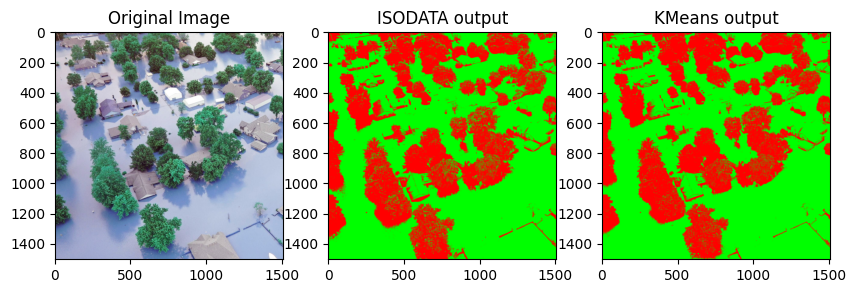

In [77]:
color_map = np.array([
    (0, 255, 0),     # green
    (255, 0, 0),     # red
    (0, 0, 255),     # blue
    (255, 255, 0),   # yellow
    (0, 255, 255),   # cyan
    (255, 0, 255),   # magenta
    (192, 192, 192), # silver
    (128, 128, 128), # gray
    (128, 0, 0),     # maroon
    (128, 128, 0),   # olive
    (0, 128, 0),     # dark green
    (128, 0, 128),   # purple
    (0, 128, 128),   # teal
    (0, 0, 128),     # navy
    (255, 255, 255), # white
    (255, 165, 0),   # orange
    (255, 192, 203), # pink
    (0, 255, 0),     # lime green
    (255, 0, 255),   # fuchsia
    (0, 255, 255),   # aqua
    (0, 128, 128),   # turquoise
])

# ISODATA seems to have reversed labels?
isodata_segmented = color_map[isodata_clustering.max() - isodata_clustering]
kmeans_segmented = color_map[kmeans_clustering]

# Display the original image and the segmented image side by side using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(isodata_segmented)
ax[1].set_title('ISODATA output')

ax[2].imshow(kmeans_segmented)
ax[2].set_title('KMeans output')
plt.show()